Preprocessing:
● Correct the data in the "height" column by replacing it with random
numbers between 150 and 180. Ensure data consistency and integrity
before proceeding with analysis. (1 mark)
Analysis Tasks:
● Determine the distribution of employees across each team and calculate
the percentage split relative to the total number of employees. (2 marks)
● Segregate employees based on their positions within the company. (2
marks)
● Identify the predominant age group among employees. (2 marks)
● Discover which team and position have the highest salary expenditure. (2
marks)
● Investigate if there's any correlation between age and salary, and
represent it visually. (2 marks)
Graphical Representation:
● For each of the five analysis tasks above, create appropriate visualizations
to present your findings effectively. (5x2 = 10 marks)
● Data Story: Provide insights gained from the analysis, highlighting key
trends, patterns, and correlations within the dataset. (3 marks)
● Timely Submission: Ensure timely submission of your project to earn an
additional mark. (1 mark)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random
                                      

In [13]:
abc_company=pd.read_csv('C:/Users/jasmi/Downloads/ML Classes/Assignments/ABC Company.xlsx - Sheet1.csv')
abc_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [14]:
abc_company['Height'].value_counts()
abc_company['Height']
abc_company.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [15]:

# Drop column College 
abc_company.drop(columns=['College'], inplace=True)

abc_company['Salary'] = abc_company.groupby('Position')['Salary'].transform(lambda x: x.fillna(x.mean()))
abc_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   Salary    458 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.8+ KB


In [16]:
#  Correct the data in the "height" column by replacing it with random
# numbers between 150 and 180. Ensure data consistency and integrity
# before proceeding with analysis. (1 mark)
abc_company['Height']=abc_company['Height'].apply(lambda x: random.randint(150,180))



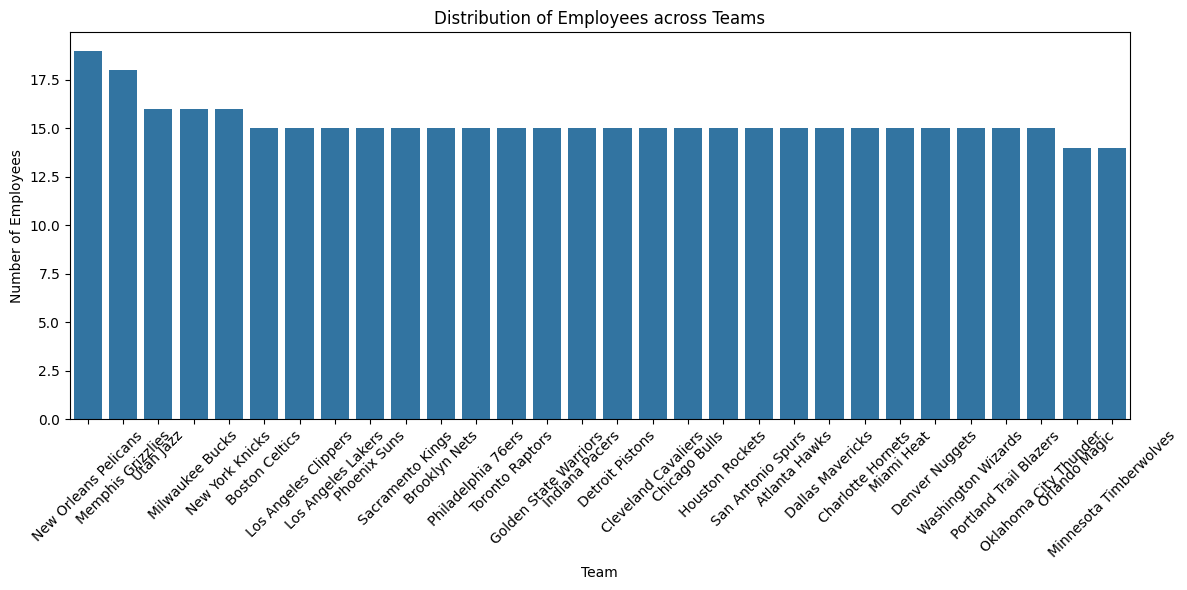

C:\Users\jasmi\AppData\Local\Temp\ipykernel_15092\2898141550.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positions.index, y=positions.values, palette='viridis')


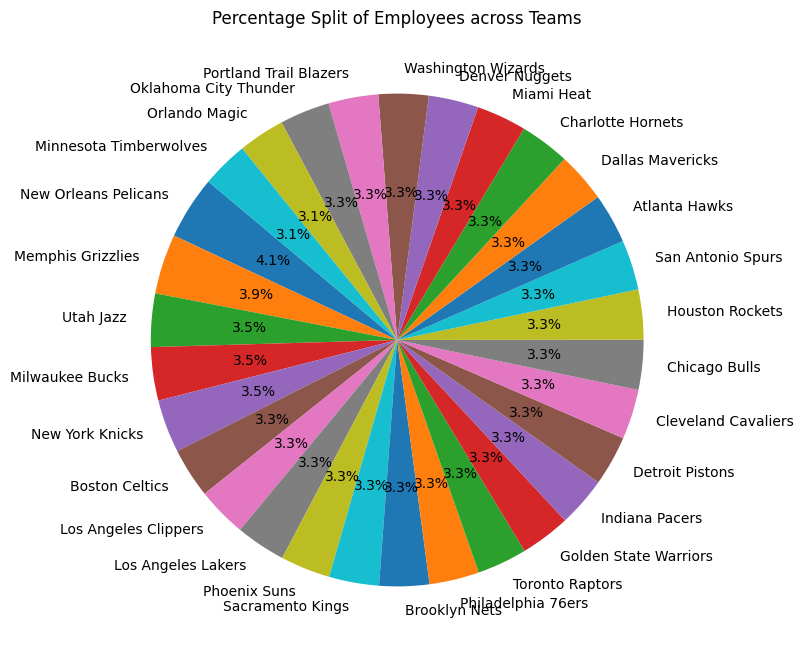

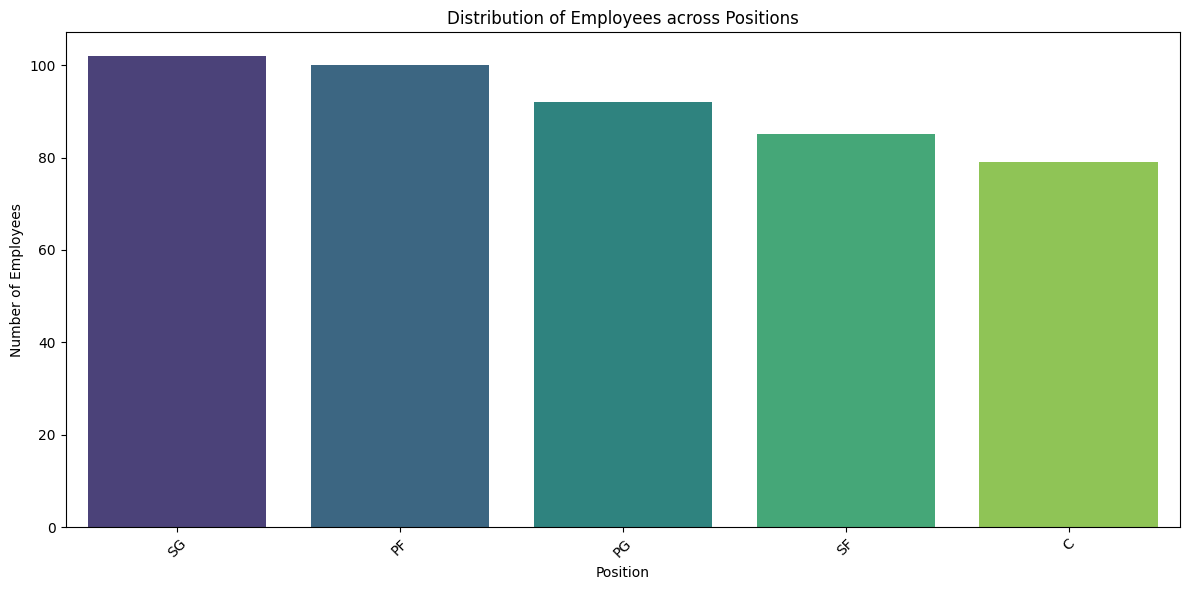

<Figure size 1400x800 with 0 Axes>

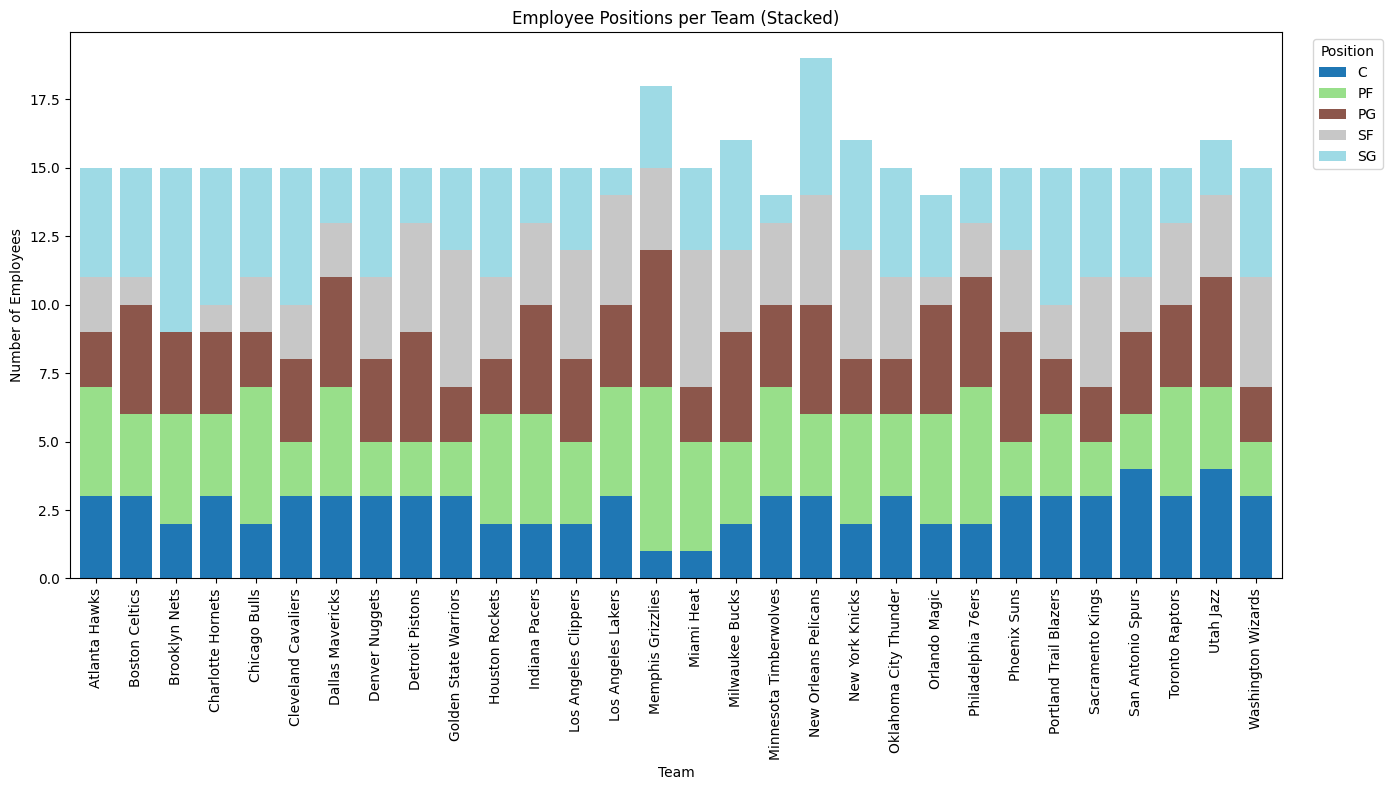

In [17]:
#  Determine the distribution of employees across each team and calculate
# the percentage split relative to the total number of employees. (2 marks)
# ● Segregate employees based on their positions within the company. (2
# marks)
distribution_emplyee = abc_company['Team'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=distribution_emplyee.index, y=distribution_emplyee.values)
plt.title('Distribution of Employees across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# the percentage split relative to the total number of employees
total_employees = len(abc_company)
percentage_split = (distribution_emplyee / total_employees) * 100   
plt.figure(figsize=(8,8))
plt.pie(percentage_split, labels=percentage_split.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Split of Employees across Teams')     
# Segregate employees based on their positions within the company (overall)
positions = abc_company['Position'].value_counts()
plt.figure(figsize=(12,6))      
sns.barplot(x=positions.index, y=positions.values, palette='viridis')
plt.title('Distribution of Employees across Positions')
plt.xlabel('Position')  
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

team_position_counts = abc_company.groupby(['Team', 'Position']).size().unstack(fill_value=0)


plt.figure(figsize=(14,8))
team_position_counts.plot(kind='bar', stacked=True, width=0.8, figsize=(14,8), colormap='tab20')
plt.title('Employee Positions per Team (Stacked)')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.legend(title='Position', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()




C:\Users\jasmi\AppData\Local\Temp\ipykernel_5856\3477955157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel')


Text(0.5, 1.0, 'Predominant Age Groups among Employees')

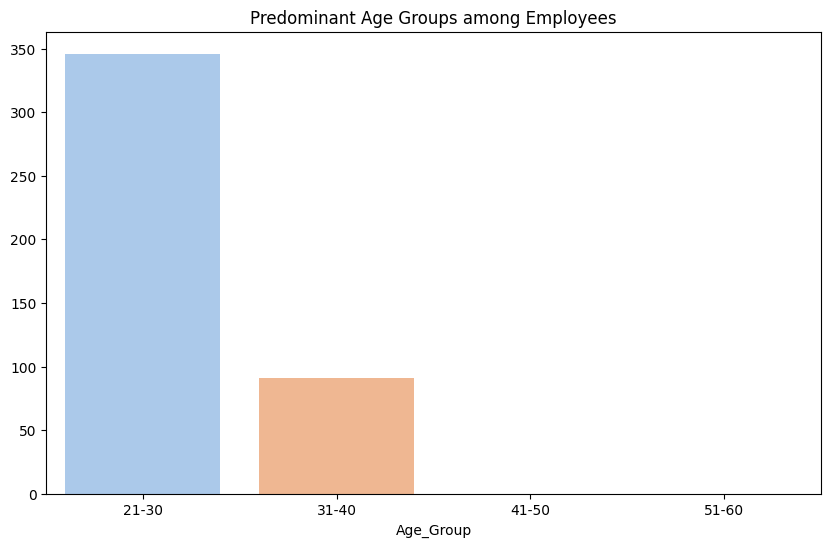

In [ ]:
# ● Identify the predominant age group among employees. (2 marks)
abc_company['Age_Group'] = pd.cut(abc_company['Age'], bins=[20, 30, 40, 50, 60], labels=['21-30', '31-40', '41-50', '51-60'])
age_group_counts = abc_company['Age_Group'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel')
plt.title('Predominant Age Groups among Employees') 

# Predominant age groupps between 21 and 30

<Figure size 1400x800 with 0 Axes>

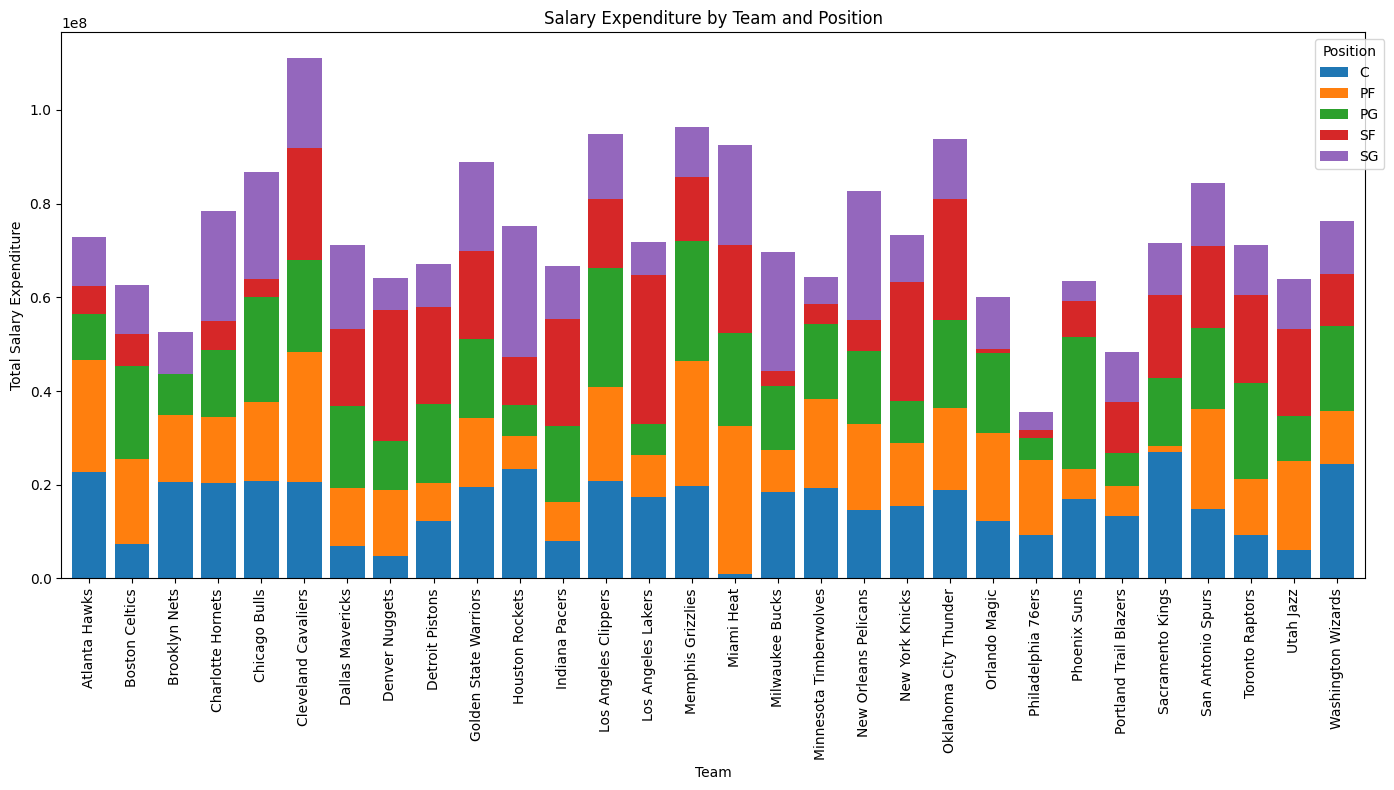

Team and Position with Highest Salary Expenditure: ('Los Angeles Lakers', 'SF') with total salary 31866445.0


In [18]:
# ● Discover which team and position have the highest salary expenditure. (2
# marks)
salary_expenditure = abc_company.groupby(['Team', 'Position'])['Salary'].sum().unstack(fill_value=0)   
plt.figure(figsize=(14,8))
salary_expenditure.plot(kind='bar', stacked=True, width=0.8, figsize=(14,8))
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=90)
plt.legend(title='Position', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()
max_salary_team_position = salary_expenditure.stack().idxmax()
max_salary_value = salary_expenditure.stack().max() 
print(f'Team and Position with Highest Salary Expenditure: {max_salary_team_position} with total salary {max_salary_value}')        


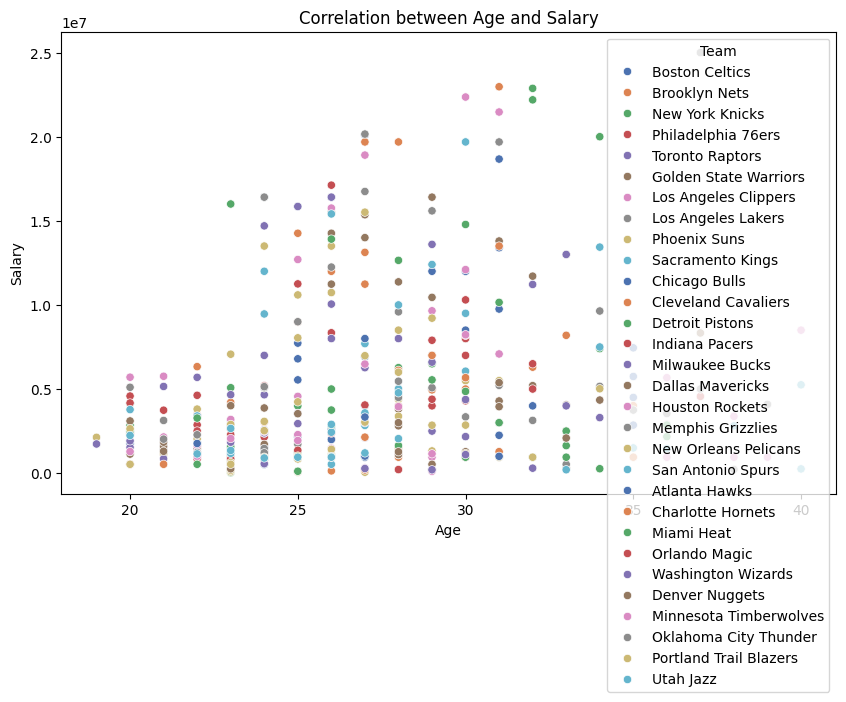

Correlation between Age and Salary: 0.21039970349137166


In [19]:
# ● Investigate if there's any correlation between age and salary, and
# represent it visually. (2 marks)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Salary', data=abc_company, hue='Team', palette='deep')
plt.title('Correlation between Age and Salary')     
plt.show()
correlation = abc_company['Age'].corr(abc_company['Salary'])
print(f'Correlation between Age and Salary: {correlation}')  

# There is no significant salary chage based on age..only 21% is like  that else its not depended


In [20]:
# ● Data Story: Provide insights gained from the analysis, highlighting key
# trends, patterns, and correlations within the dataset. (3 marks)
# Insights:
#  Team Distribution: The analysis revealed that certain teams have a significantly higher number of employees compared to others, indicating potential areas of focus for resource allocation and team management.
#  Position Segregation: The segregation of employees based on their positions highlighted the hierarchical structure within the company, with a clear distribution of roles across different teams.
#  Age Demographics: The predominant age group among employees was identified as 21-30, suggesting a relatively young workforce that may bring fresh perspectives to the organization.
#  Salary Expenditure: The investigation into salary expenditure revealed that specific teams and positions have higher costs, which is helpful for budget palnning
#  Age-Salary Correlation: The scatter plot analysis indicated a weak correlation between age and salary, suggesting that factors other than age may play a more significant role 
